# Breast Cancer - **part 1: EDA**

## **0.** Settings

In [1]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

# No warnings (seaborn)
import warnings
warnings.filterwarnings("ignore")

## **1.** Dataset

In [ ]:
'''

    DATASET INFORMATIONS

    |------------------------|------------|------------------------------------------------------------------|
    | Name                   | Data Type  | Description                                                      |
    |------------------------|------------|------------------------------------------------------------------|
    | id                     | nominal    | ID number                                                        |
    | diagnosis              | nominal    | (target) M = malignant, B = benign                               |
    | radius_mean            | continuous | radius: mean of distances from center to points on the perimeter |
    | texture_mean           | continuous | texture: standard deviation of gray-scale values                 |
    | perimeter_mean         | continuous | perimeter                                                        |
    | area_mean              | continuous | area                                                             |
    | smoothness_mean        | continuous | smoothness: local variation in radius lengths                    |
    | compactness_mean       | continuous | compactness: perimeter^2 / area - 1.0                            |
    | concavity_mean         | continuous | concavity: severity of concave portions of the contour           |
    | concave points_mean    | continuous | concave points: number of concave portions of the contour        |
    | symmetry_mean          | continuous | symmetry                                                         |
    | fractal_dimension_mean | continuous | fractal dimension: coastline approximation - 1                   |
    |------------------------|------------|------------------------------------------------------------------|

'''

In [35]:
# Import the dataset
data = pd.read_csv('./breast.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [36]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [37]:
data.columns[1:12]

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [38]:
# We'll consider only the 'mean' features
data = data[data.columns[1:12]]
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


## **2.** Data preprocessing

In [40]:
# Null elements
data.isnull().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [41]:
data.isnull().any()

diagnosis                 False
radius_mean               False
texture_mean              False
perimeter_mean            False
area_mean                 False
smoothness_mean           False
compactness_mean          False
concavity_mean            False
concave points_mean       False
symmetry_mean             False
fractal_dimension_mean    False
dtype: bool

In [42]:
# Encoding of the target:
data['diagnosis'].replace(to_replace=['B', 'M'], value=[0, 1], inplace=True)

In [43]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


## **3.** Exploratory Data Analysis

### **3.1.** Countplot

Number of malignant samples:  212
Number of benign samples:  357
Malignant percentage:  37.258347978910365 %
Benign percentage:  62.741652021089635 %


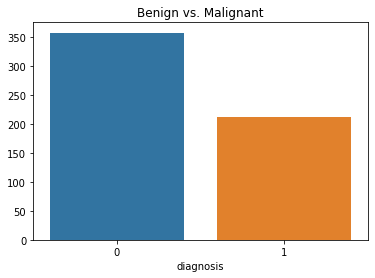

In [45]:
# Malignant vs. benign
print('Number of malignant samples: ', len(data[data['diagnosis']==1]))
print('Number of benign samples: ', len(data[data['diagnosis']==0]))

print('Malignant percentage: ', len(data[data['diagnosis']==1])/len(data)*100, '%')
print('Benign percentage: ', len(data[data['diagnosis']==0])/len(data)*100, '%')

sns.countplot(x = 'diagnosis', data=data);
plt.title('Benign vs. Malignant');
plt.ylabel(None);
plt.show();

In [46]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [47]:
features = data[list(data.columns)[1:12]]
features.columns

# Equivalently (more fast)
features = data.drop('diagnosis', axis=1)
features.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

### **3.2.** Histplot

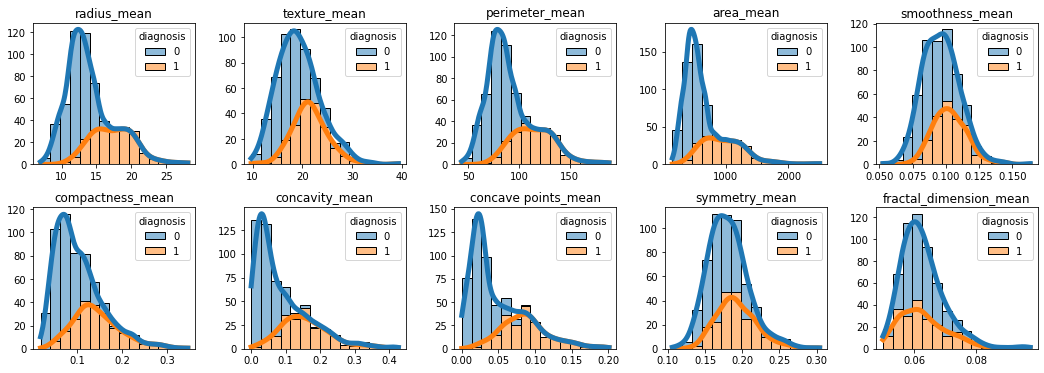

In [48]:
def histplot_continuous(x, data, hue):
    sns.histplot(data=data, x=x, hue=hue,
        kde=True, bins=15, palette='tab10', multiple='stack', line_kws={'lw': 5});

plt.figure(figsize=(18, 6))
n_row = 2
n_col = 5
hue = 'diagnosis'

for i in range(len(features.columns)):
    plt.subplot(n_row, n_col, i+1);
    histplot_continuous(x=list(features.columns)[i], data=data, hue=hue);
    plt.title(list(features.columns)[i]);
    plt.ylabel(None);
    plt.xlabel(None);

plt.subplots_adjust(wspace=.3, hspace=.3)

### **3.3.** Violin plot, Boxplot, Swarmplot (std features)

In [49]:
# The dataset need to be changed:
feat_std = (features-features.mean()) / (features.std()) 
data_std = pd.concat([data['diagnosis'], feat_std], axis=1)
data_std = pd.melt(data_std, id_vars='diagnosis', var_name='features', value_name='value')
data_std

,diagnosis,features,value
0,1,radius_mean,1.096100
1,1,radius_mean,1.828212
2,1,radius_mean,1.578499
3,1,radius_mean,-0.768233
4,1,radius_mean,1.748758
...,...,...,...
5685,1,fractal_dimension_mean,-0.930209
5686,1,fractal_dimension_mean,-1.057681
5687,1,fractal_dimension_mean,-0.894800
5688,1,fractal_dimension_mean,1.042778


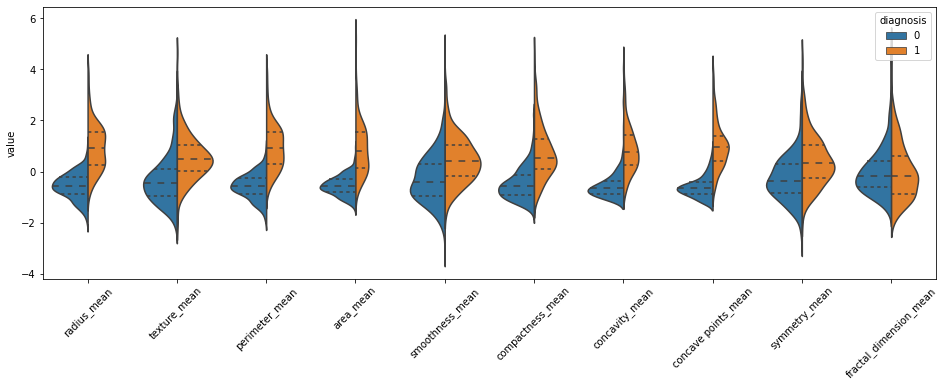

In [50]:
# Violinplot
plt.figure(figsize=(16,5));
sns.violinplot(x='features', y='value', hue='diagnosis', data=data_std, split=True, inner='quart');
plt.xticks(rotation=45);
plt.xlabel(None);

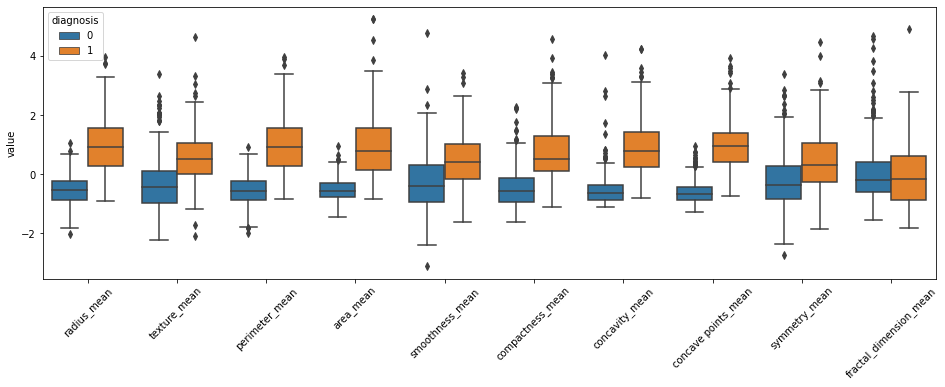

In [51]:
# Boxplot
plt.figure(figsize=(16,5));
sns.boxplot(x='features', y='value', hue='diagnosis', data=data_std);
plt.xticks(rotation=45);
plt.xlabel(None);

The boxplot seems to show a clear separation between the values associated with 'benign' vs. 'malignant' (in all features). This was also seen in the violinplot, but is particularly highlighted here.

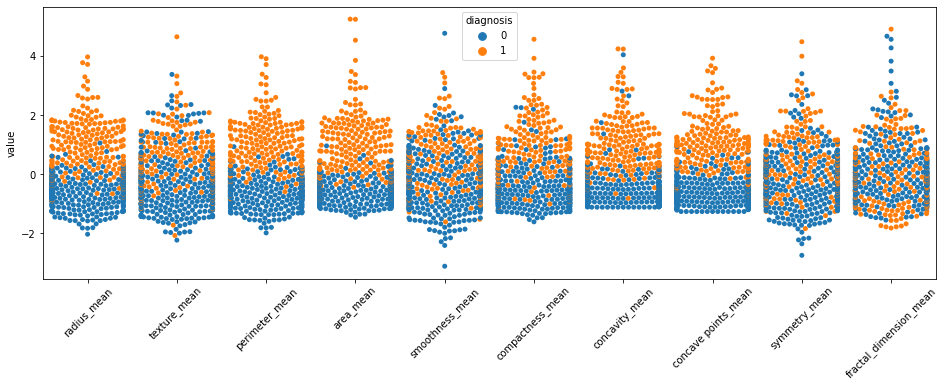

In [52]:
# Swarmplot
plt.figure(figsize=(16,5));
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data_std);
plt.xticks(rotation=45);
plt.xlabel(None);

### **3.4.** Correlations

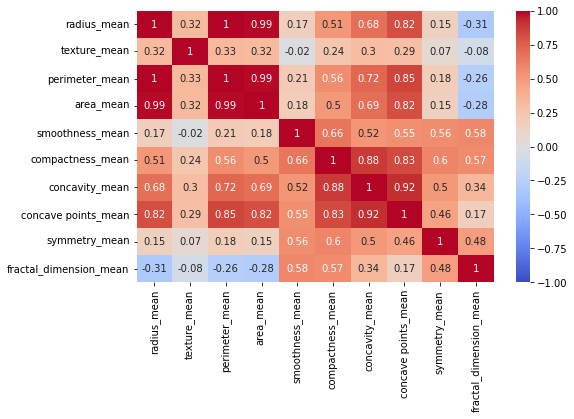

In [53]:
# Correlation matrix
correlation_matrix = features.corr().round(2)

plt.figure(figsize=(8,5));
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1);

The correlation coefficient ranges from -1 to 1:
* if the value is close to 1 there is a strong positive correlation between the two variables
* if the value is close to -1, the variables have a strong negative correlation

An important point in selecting features for any model is to **check for multi-co-linearity**.<br> 

There are many features that have a high correlation: it will probably be a case of not considering them together.

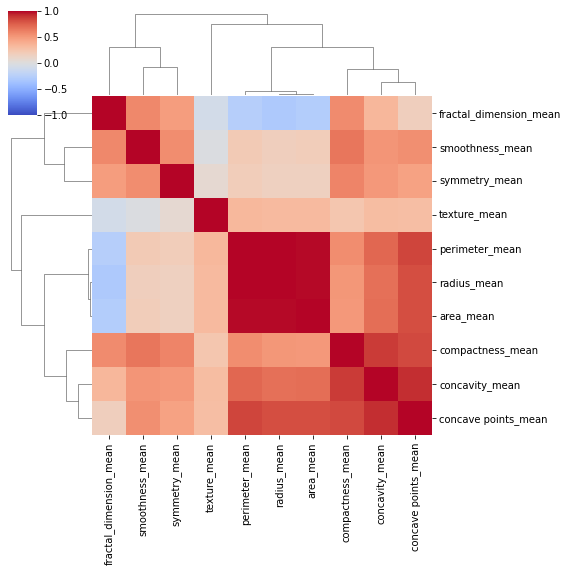

In [54]:
sns.clustermap(correlation_matrix, annot=False, vmin=-1, vmax=1, cmap='coolwarm', figsize=(8,8));

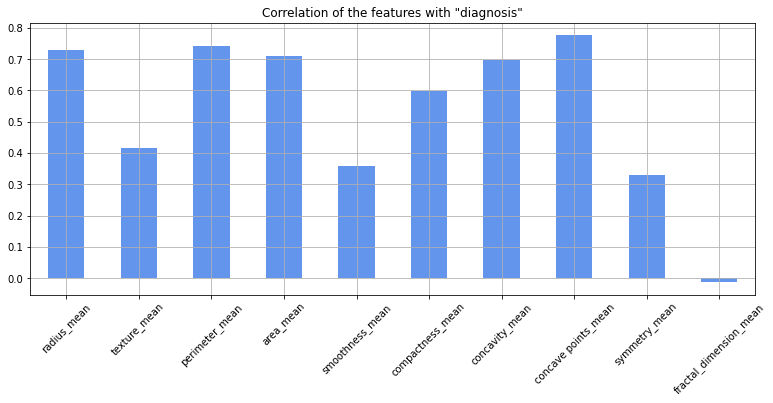

In [63]:
# Correlation of the features with the target
plt.figure(figsize=(13, 5))
features.corrwith(data['diagnosis']).plot(kind='bar', grid=True, color='cornflowerblue',
    title='Correlation of the features with "diagnosis"');
plt.xticks(rotation=45);

**Insights:**
* `fractal_dimension_mean` is the least correlated with the target variable (as also seen previously)
* all other features have a significant correlation with the target variable

*Note.* Since we have seen that the variables are strongly correlated with each other, if we have to choose which ones to keep and which ones not to keep, we can rely on this plot.

### **3.5.** Pairplot

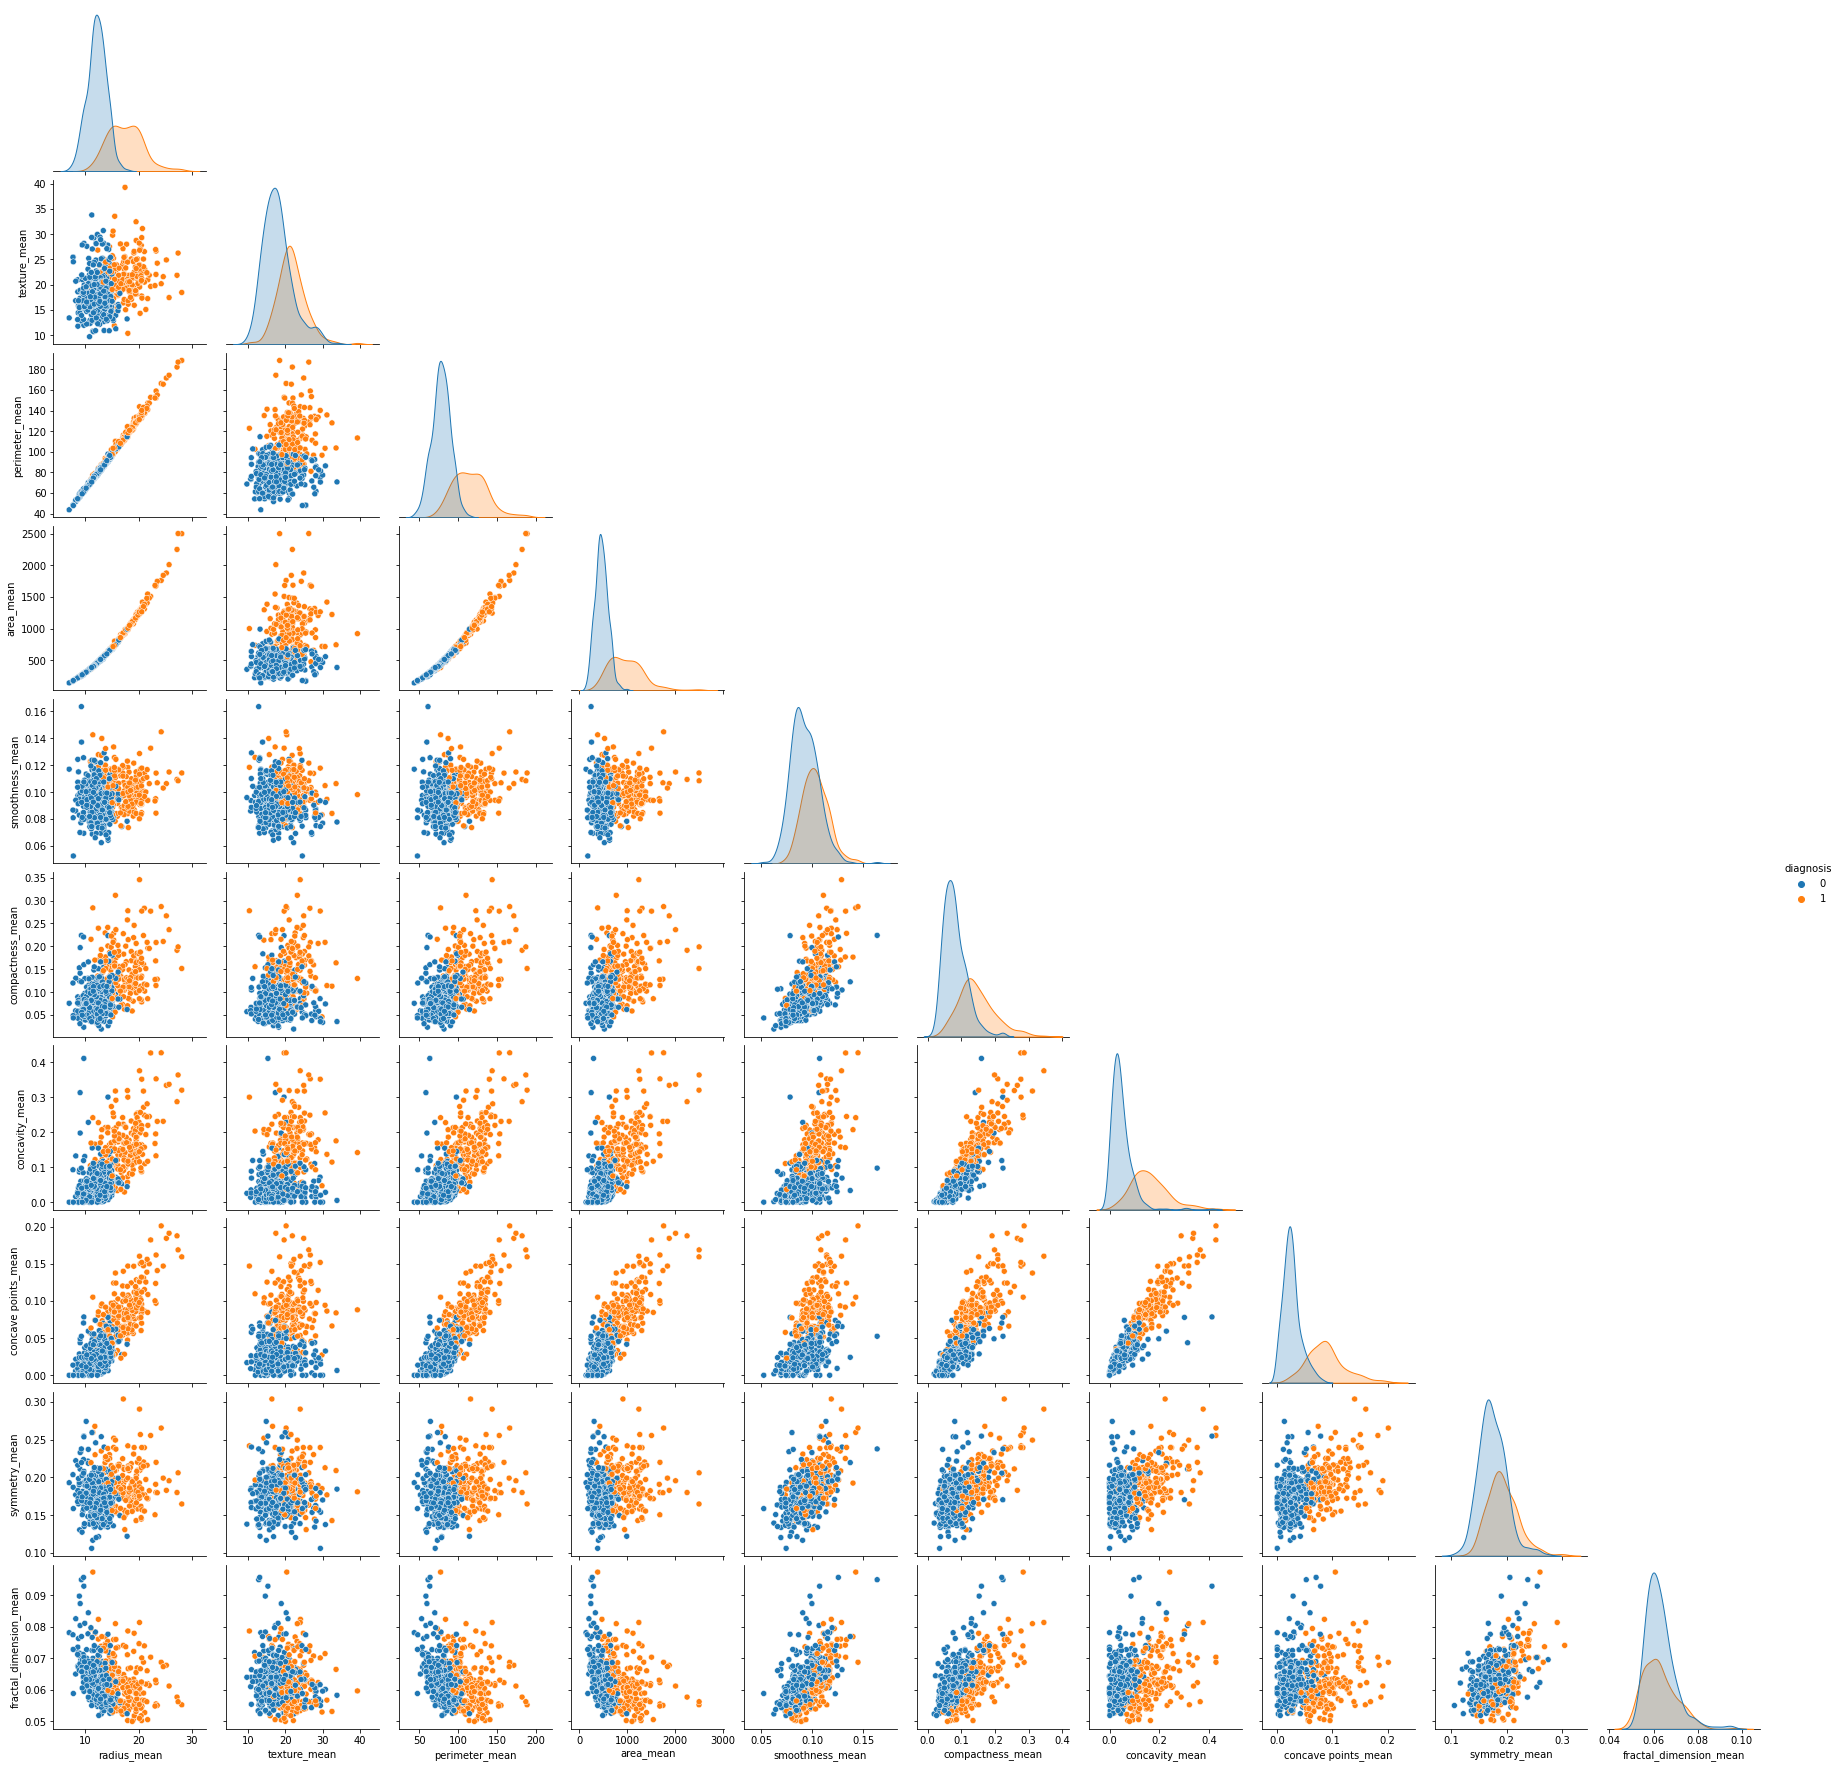

In [65]:
sns.pairplot(data=data, hue='diagnosis', palette='tab10', corner=True);